<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [19]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [20]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [32]:
### from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop

batch_size = 46
max_features = len(word_index.values()) + 1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
optimizer = RMSprop(lr=0.01)

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 46)                5934      
Total params: 4,102,958
Trainable params: 4,102,958
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 13s 6ms/sample - loss: 1.6667 - acc: 0.5953
Test score: 1.6666666377577948
Test accuracy: 0.5952805


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

pad_sequences is used to ensure that all sequences in a list have the same length. Adds padding.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Typically LSTM outperforms RNN, as it does a better job at avoiding the vanishing gradient problem, and can model longer dependences. LSTMs address this issue by adding forget/remember gates.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. handwriting recognition
2. language translation
3. sentiment analysis
4. text generation


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [36]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://img-aws.ehowcdn.com/350x235p/photos.demandstudios.com/getty/article/110/213/78036715_XS.jpg
Completed Image ====> 1.78036715_XS.jpg
Image URL: https://www.maxpixel.net/static/photo/1x/Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Completed Image ====> 2.Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Image URL: https://c8.alamy.com/comp/C63A50/green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Completed Image ====> 3.green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Image URL: https://cdn.pixabay.com/photo/2018/07/29/16/11/water-lilies-3570439_960_720.jpg
Completed Image ====> 4.water-lilies-3570439_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 5.Frog-on-lily-pad.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [78]:
# You've got something to do in this cell. ;)

import numpy as np
import re

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    x = image.img_to_array(process_img_path(img))
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if re.search("frog", entry[1]):
            return entry[2]
    return 0.0

In [79]:
img_contains_frog(absolute_image_paths[0]['lilly frog pond'][1])

[('n01644373', 'tree_frog', 0.92792773), ('n01644900', 'tailed_frog', 0.039370015), ('n01641577', 'bullfrog', 0.022811491)]


0.92792773

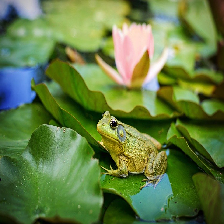

In [80]:
process_img_path(absolute_image_paths[0]['lilly frog pond'][1])

#### Stretch Goal: Displaying Predictions

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
    - As of now I feel as though I am a bit of a jack of all trades and master of none. I really do want to focus more on Machine Learning, Neural Networks, Deep learning, and AI.
- What area of Data Science would you most like to learn more about, and why?
    - AI/AGI Because I think that it's very exciting and a new front for mankind. I want to be involved as to help guide it in the right direction if possible.
- Where do you think Data Science will be in 5 years?
    - I think that there will be much more concensus about what Data Science means. It's going to be seperated into more discrete job terms.
- What are the threats posed by AI to our society?
    - 2 scenarios. First, AI is programmed to cause harm. Second, AI is programmed for the benefit of people but finds destructive methods of achieving it. But in all fairness, it's ultimately the decisions of people that will cause threats to society.
- How do you think we can counteract those threats? 
    - We can take as many precausions necessary but I think we will encounter the threats and get past them.
- Do you think achieving General Artifical Intelligence is ever possible?
    - I don't see why not. It might not be soon but it's definitely possible.
A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [76]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")